In [1]:
import pandas as pd
from underthesea import word_tokenize

In [2]:
filename = 'facebook_comment_2k7.csv'
df = pd.read_csv(filename)
df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
df['label'] = df['label'].apply(lambda x: eval(x))
print(df.shape)

(2700, 2)


In [3]:
categories = ["dangerous_content","sexaully_explixit","harassment","hate_speech","normal"]

In [4]:
idx2cat = {i: cat for i, cat in enumerate(categories)}

In [5]:
idx2cat

{0: 'dangerous_content',
 1: 'sexaully_explixit',
 2: 'harassment',
 3: 'hate_speech',
 4: 'normal'}

In [6]:
for cate in categories:
    df[cate] = df['label'].apply(lambda x: True if cate in x else False)

In [7]:
df.head()

,text,label,dangerous_content,sexaully_explixit,harassment,hate_speech,normal
0,Noi cho biet k rãnh viet voi loai ng nhu chị c...,[harassment],False,False,True,False,False
1,-Giải ngân cực nhanh\n-mức vay lên đến 15tr\n👉...,[dangerous_content],True,False,False,False,False
2,Thủ tục đơn giản đăng ký khoản vay giải ngân l...,[dangerous_content],True,False,False,False,False
3,săn mãi con đen v5 cả tối k đc an ủi đc con be...,[normal],False,False,False,False,True
4,zalo 0375841653 ae nào mua kết bạn zalo đặt hà...,[dangerous_content],True,False,False,False,False


In [8]:
# df.drop(df[df['normal'] == True].sample(frac=0.5).index, inplace=True)

In [9]:
df['sexaully_explixit'].sum()

222

<AxesSubplot:>

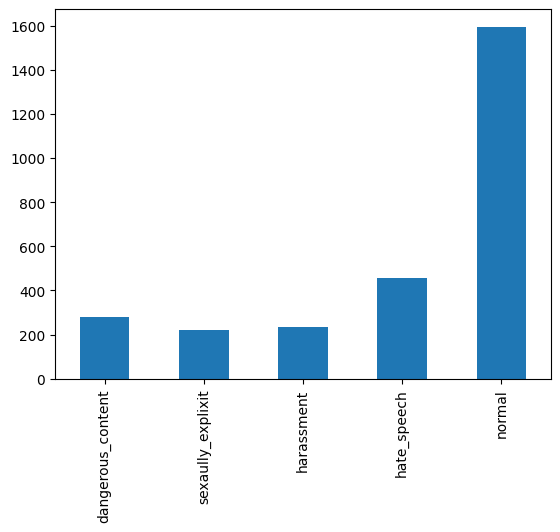

In [10]:
df[['dangerous_content', 'sexaully_explixit', 'harassment', 'hate_speech', 'normal']].sum().plot(kind='bar')

In [11]:
df['text'] = df['text'].apply(lambda x: word_tokenize(x,format='text').lower())

In [12]:
df.drop('label', axis=1, inplace=True)

In [13]:
df.head()

,text,dangerous_content,sexaully_explixit,harassment,hate_speech,normal
0,noi cho biet k rãnh viet voi loai ng nhu_chị c...,False,False,True,False,False
1,- giải_ngân cực nhanh - mức vay lên đến 15 tr ...,True,False,False,False,False
2,thủ_tục đơn_giản đăng_ký khoản vay giải_ngân l...,True,False,False,False,False
3,săn mãi con đen v5 cả tối k đc an_ủi đc con be...,False,False,False,False,True
4,zalo 0375841653 ae nào mua kết_bạn zalo đặt_hà...,True,False,False,False,False


In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

X_train = train['text']
X_test = test['text']

In [15]:
y_train = train.drop("text", axis=1)
y_test = test.drop("text", axis=1)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(df['text'])

In [17]:
X_train = t.texts_to_matrix(X_train)
X_test = t.texts_to_matrix(X_test)

In [18]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [19]:
nb = MultinomialNB()
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)
multi_target_nb.fit(X_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB(), n_jobs=-1)

In [20]:
y_pred = multi_target_nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6689113355780022


In [21]:
for i, p in enumerate(y_pred):
    print("Sequence:", test['text'].values[i])
    pred = []
    for idx, value in enumerate(p):
        if (value == True):
            pred.append(idx2cat[idx])
    hand_labeled = []
    for idx, value in enumerate(y_test.values[i]):
        if (value == True):
            hand_labeled.append(idx2cat[idx])
    print("Predicted label:", pred)
    print("Hand-labeled:", hand_labeled)

Sequence: phương_kiều giờ thèm uống tiger quá thì làm_sao hả_thảo 🤣_🤣 lê_thanh_thảo lê_trần
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: heo mập bơm ít tiền fang mua máu fang tụi nó đi bạn
Predicted label: []
Hand-labeled: ['normal']
Sequence: mũi bát_thẳg hơn giới_tính của c nữa bát à 😍 😍
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: ôi zồi_ôi nhất nàng rùii 😍 😍_như này thêm 2 bé nữa cũng không sợ gì kkk
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: để layer chán rồi để 2 mái đến đâu là đẹp anh ơi
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: uh luu vao e_ah de may hom_nua nha_minh di
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: chị mình cấy mông ở đây r đẹp lắm chứ k giả như đặt túi :d
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: em cao 1 m61 46 kg bạn em cao 1 m73 nặng 43 kg ạ
Predicted label: ['normal']
Hand-labeled: ['normal']
Sequence: mỹ hằng ko hỏi thì bảo vô_tâm . bạn_bè nh

In [22]:
question = [word_tokenize("Mày ngu quá",format='text').lower()]
question = t.texts_to_matrix(question)
y_output = multi_target_nb.predict(question)
print(y_output)
pred = []
for idx, value in enumerate(y_output[0]):
    if (value == True):
        pred.append(idx2cat[idx])
print("Predicted:", pred)

[[False False False  True False]]
Predicted: ['hate_speech']


In [23]:
question = [word_tokenize("sao mày ngu thế con đĩ",format='text').lower()]
question = t.texts_to_matrix(question)
y_output = multi_target_nb.predict(question)
print(y_output)
pred = []
for idx, value in enumerate(y_output[0]):
    if (value == True):
        pred.append(idx2cat[idx])
print("Predicted:", pred)

[[False False  True  True False]]
Predicted: ['harassment', 'hate_speech']


In [25]:
question = [word_tokenize("hiếp dâm ẩm thực",format='text').lower()]
question = t.texts_to_matrix(question)
y_output = multi_target_nb.predict(question)
print(y_output)
pred = []
for idx, value in enumerate(y_output[0]):
    if (value == True):
        pred.append(idx2cat[idx])
print("Predicted:", pred)

[[False  True False False False]]
Predicted: ['sexaully_explixit']
